In [24]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Set the seed
random.seed(44)

In [25]:
def data_clean(x0,scale):
    # Assuming each line has 12 data points and 1 label
    column_names = [f'x_{i}' for i in range(1, 13)] + ['y']
    df = pd.read_csv('hw1_train.dat', sep=' ', names=column_names, engine='python')
    df = df.dropna()
    
    # Extracting data points
    data = df.iloc[:, :-1].values
    data = np.insert(data, 0, x0, axis=1)
    data = scale * data
    
    # Extracting labels
    labels = df['y'].values

    return data, labels

In [26]:
def sign(x): 
    if x == 0: 
        return -1 ### set sign(0) = -1
    else:
        return int(math.copysign(1, x))

In [27]:
def pla(data, labels):
    w_final = []
    update_list = []
    w0 = np.zeros(len(data[0]))
    N = 256
    
    for i in range(1000):
        w_temp = w0
        random_index_w0 = random.randint(0, len(data) - 1)
        w_temp = w_temp + labels[random_index_w0] * data[random_index_w0] ## no check w(0), w(0) always false
        update = 0
        time = 1

        while True:
            random_index = random.randint(0, len(data) - 1)
            number = np.dot(w_temp, data[random_index])
            
            #update
            if sign(number) != labels[random_index]:
                w_temp = w_temp + labels[random_index] * data[random_index]
                time = 0
                update += 1

            else:
                time += 1
            
            
            # end condition
            if time == 5*N:
                break

        update_list.append(update)
        
    return update_list

現在的問題
1. 要不要check w = 0, 初始狀態？目前直接當他是錯的
2. 第12題的程式邏輯是什麼？隨機抓一個點，抓到後更新到是對的，然後總共要對 5*N 次

In [28]:
def pla_var(data, labels):
    w_final = []
    update_list = []
    w0 = np.zeros(len(data[0]))
    N = 256
    
    for i in range(1000): # 1000 experiments
        w_temp = w0
        random_index_w0 = random.randint(0, len(data) - 1)
        w_temp = w_temp + labels[random_index_w0] * data[random_index_w0] ## no check w(0), w(0) always false
        update = 0
        time = 1

        while True:
            random_index = random.randint(0, len(data) - 1)
            number = np.dot(w_temp, data[random_index])
                
            #keep update until this example is correct
            if sign(number) != labels[random_index]:
                while True:
                    w_temp = w_temp + labels[random_index] * data[random_index]
                    update += 1
                    if sign(np.dot(w_temp, data[random_index])) == labels[random_index]:
                        time = 1
                        break

            else:
                time += 1
        
            # end condition
            if time == 5*N:
                break

        update_list.append(update)
        
    return update_list

In [29]:
def plot(update):
    # 使用plt.hist()繪製直方圖
    plt.hist(update, bins=20, edgecolor='black')  # bins 參數決定有多少柱狀，你可以根據需要調整

    plt.title("Histogram of update")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.show()  # 顯示圖形

### 第九題

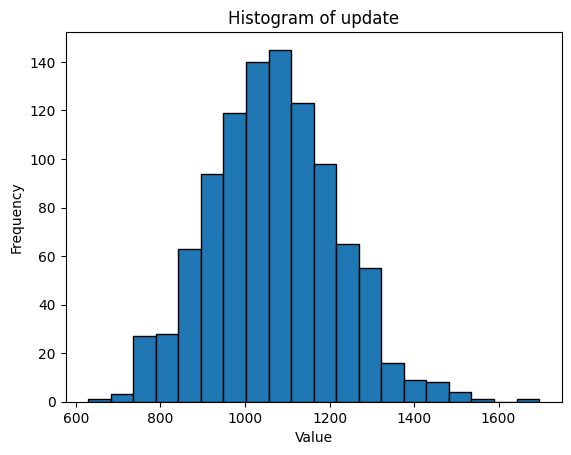

In [30]:
data9, labels9 = data_clean(1, 1)
update9 = pla(data9, labels9)
plot(update9)

### 第十題

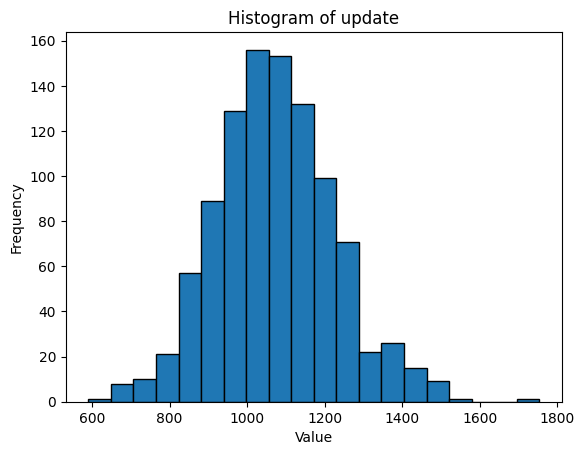

In [31]:
data10, labels10 = data_clean(1, 11.26)
update10 = pla(data10, labels10)
plot(update10)

### 第十一題

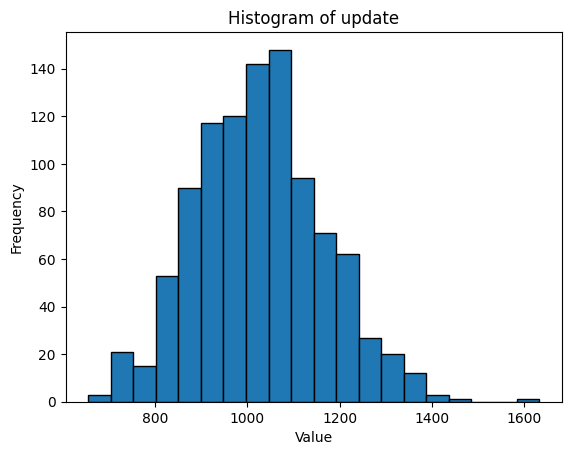

In [32]:
data11, labels11 = data_clean(11.26, 1)
update11 = pla(data11, labels11)
plot(update11)

### 第十二題

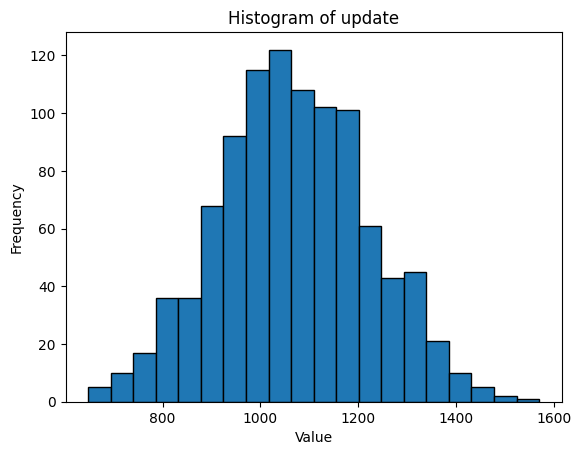

In [33]:
data12, labels12 = data_clean(1, 1)
update12 = pla_var(data12, labels12)
plot(update12)

In [38]:
print(update9)

[990, 1334, 780, 688, 1007, 1067, 1086, 1385, 1229, 1110, 949, 1257, 1015, 941, 1031, 1138, 998, 1118, 941, 901, 1032, 1132, 1116, 1125, 971, 1076, 1178, 947, 945, 1145, 942, 1027, 1227, 952, 940, 1113, 1055, 858, 1082, 1140, 957, 911, 1045, 922, 1080, 875, 989, 1222, 1198, 1021, 1283, 889, 1219, 935, 914, 834, 1123, 1172, 1248, 1252, 1177, 782, 1120, 994, 787, 793, 1148, 1013, 991, 1126, 1129, 1056, 923, 810, 921, 1060, 1055, 1213, 1116, 1003, 984, 1170, 1321, 928, 1067, 1094, 1048, 806, 963, 1047, 1020, 1024, 955, 629, 1031, 1018, 1145, 1024, 1023, 869, 1092, 892, 986, 1070, 1055, 1262, 1145, 1149, 785, 1282, 1280, 1207, 934, 771, 1113, 835, 1024, 931, 1162, 1017, 943, 970, 873, 1219, 1282, 1107, 1293, 1202, 994, 857, 1073, 1119, 1251, 1263, 1243, 1189, 1268, 1128, 873, 979, 1145, 930, 934, 1103, 1117, 937, 1240, 858, 1024, 896, 1066, 912, 1313, 1165, 1079, 1246, 1075, 939, 1235, 1200, 1043, 1048, 1288, 1097, 967, 939, 939, 1157, 1287, 1007, 1119, 1021, 747, 1280, 848, 1055, 1037, 10

In [39]:
print(update10)

[998, 1421, 1021, 977, 1338, 1002, 1040, 976, 905, 867, 1077, 1051, 1131, 1181, 935, 802, 1497, 952, 1061, 1103, 1384, 976, 1251, 1152, 941, 1216, 1248, 989, 1309, 1135, 1189, 967, 1081, 1271, 1181, 1017, 1086, 965, 1006, 1322, 1149, 979, 1026, 1053, 1123, 892, 1358, 680, 1218, 1418, 1104, 1034, 1215, 1071, 1221, 1017, 1099, 949, 1194, 794, 977, 934, 1455, 857, 1240, 861, 1195, 1452, 985, 1023, 1353, 1285, 1049, 1059, 1007, 1060, 1101, 1114, 1104, 921, 977, 1018, 1192, 1196, 1144, 966, 1082, 920, 1242, 1128, 1246, 1069, 1236, 1021, 969, 1172, 1086, 1098, 1001, 749, 1182, 913, 1155, 972, 1340, 1264, 1112, 1109, 1201, 1375, 1093, 1187, 1100, 1047, 1282, 779, 1099, 1008, 1097, 908, 953, 1090, 590, 956, 985, 1001, 1048, 1088, 1069, 1140, 1114, 1147, 940, 1429, 1210, 1036, 1098, 1033, 1009, 946, 1107, 1187, 851, 1343, 969, 1223, 1241, 921, 1131, 965, 827, 1001, 954, 1191, 941, 881, 1089, 986, 1015, 1071, 950, 697, 861, 890, 969, 1282, 1069, 948, 927, 1016, 994, 1150, 1104, 938, 952, 1476, 8

In [40]:
print(update11)

[827, 1176, 941, 1003, 862, 844, 1073, 981, 784, 1085, 875, 1131, 1233, 1210, 1032, 1000, 1109, 921, 1065, 974, 866, 1325, 906, 782, 1127, 1067, 994, 938, 855, 933, 1001, 988, 1006, 1020, 1205, 991, 749, 1106, 1066, 1276, 1380, 1090, 1002, 1028, 1190, 947, 956, 1216, 1304, 699, 820, 959, 1091, 1035, 1091, 1005, 1223, 1237, 858, 937, 983, 899, 1081, 1266, 1295, 1177, 1059, 1092, 745, 1111, 889, 917, 1045, 1068, 1003, 1143, 980, 837, 1043, 913, 1015, 823, 1112, 1274, 884, 1060, 1313, 1004, 1292, 1241, 1193, 1047, 1398, 945, 975, 1183, 1166, 1197, 910, 858, 1145, 933, 1148, 1042, 1145, 859, 1225, 1092, 869, 1166, 1074, 1070, 1119, 1270, 1063, 939, 953, 705, 1039, 1149, 1223, 928, 1164, 1022, 1057, 891, 1005, 963, 970, 903, 1039, 1008, 875, 890, 914, 967, 931, 840, 895, 876, 732, 862, 1182, 1017, 956, 942, 1034, 1194, 881, 1064, 1054, 996, 924, 1035, 1030, 866, 1068, 1237, 861, 949, 835, 1171, 855, 986, 840, 1133, 1029, 1123, 856, 859, 875, 994, 837, 1004, 1108, 924, 1127, 1084, 1128, 1112

In [41]:
print(update12)

[951, 1185, 851, 974, 1180, 915, 985, 910, 871, 1107, 1007, 791, 1022, 1053, 874, 1239, 1446, 974, 1000, 946, 983, 993, 897, 1127, 1180, 1213, 1180, 969, 915, 977, 1068, 1049, 1112, 866, 1055, 1179, 1211, 1279, 730, 725, 1148, 935, 978, 1223, 1267, 1034, 1062, 1277, 1040, 1090, 879, 934, 834, 1335, 994, 1154, 1270, 806, 990, 1015, 884, 1264, 1121, 1103, 825, 1043, 1099, 1075, 1311, 1184, 1113, 746, 1018, 1228, 742, 999, 1133, 1064, 953, 1275, 957, 1152, 1090, 1088, 1049, 1178, 957, 1041, 923, 1219, 1363, 1359, 1094, 950, 879, 877, 1021, 1043, 1097, 1373, 960, 1197, 1175, 907, 1078, 1297, 1265, 1035, 1013, 986, 1242, 1077, 1000, 996, 1304, 1115, 959, 1017, 1016, 1174, 1149, 1137, 1108, 1178, 738, 908, 946, 1226, 1027, 990, 1047, 814, 1439, 946, 1138, 1295, 1218, 1160, 888, 875, 1085, 967, 1315, 999, 1110, 1021, 1062, 949, 1145, 1134, 1163, 900, 1186, 1075, 846, 941, 985, 1246, 1039, 1027, 999, 810, 996, 1157, 971, 974, 1091, 873, 1272, 1078, 1159, 996, 1415, 978, 1125, 1045, 1107, 903, 